In [1]:
#happy little imports
import geopandas
#put in two more beacuse everyone needs a friend
import numpy as np
import pandas as pd
#and one more so they can play party games 
import datetime
#ok lots of friends now,maybe they can play settlers of Caton
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
#football game?
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import datadotworld as dw


def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # this is a funtion that imports the data we need 
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    # renames things for eaiser use 
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    # Uses ederal Information Processing Standard State Code but bassically combines county and state codes 
      #so one code tells us exacty where we are 
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # makes the aformationd locatiuonal codes our index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data
def import_covid_data(filename, FIPS_name):
      #uses the info from jhon hopkins to load all the data we need 
    dataset = dw.load_dataset("associatedpress/johns-hopkins-coronavirus-case-tracker",
                              auto_update = True)
    # We dont need all the data so we are just getting two 
    covid_data = dataset.dataframes["2_cases_and_deaths_by_county_timeseries"]
   
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]

    # Makes the values ints from float 
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
    covid_data['date'] = pd.to_datetime(covid_data['date'])
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    # creates a colom of state abrivatins since it might be hard to fit the whole state name on 
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        covid_data.loc[covid_data["state"] == state, "state_abr"] = abr
    # Creates one adress with state and county name 
    covid_data["Location"] = covid_data["location_name"] + ", " + \
        covid_data["state_abr"]

    return covid_data
#the aformentioned state abrivations 
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})


fips_name = "fips_code"
covid_filename = "COVID19DataAP.csv"
# Renames out FIPS 
map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                index_col = "Date", FIPS_name= fips_name)
covid_data = import_covid_data(filename = covid_filename, FIPS_name = fips_name)
# getting dates as well to code for anouther axus 


C:\Users\The Grand Tabaxi\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


<AxesSubplot:>

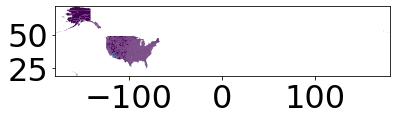

In [2]:
map_data.plot(column = "Population")

In [3]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [4]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2021-12-12  84056045        county        Weston  Wyoming   
          2021-12-13  84056045        county        Weston  Wyoming   
          2021-12-14  84056045        county        Weston  Wyoming   
          2021-12-15  84056045        county        Weston  Wyoming   
          2021-12-16  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2021-12-12            7100.0              1218   
          2021-12-13            7100.0              1226   
          2021-12-14            7100.0              1232   
          2021-12-15            7100.0              1236   
          2021-12-16            7100.0              1236   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2021-12-12                      17154.93                 14   
          2021-12-13                      17267.61                 14   
          2021-12-14                      17352.11                 14   
          2021-12-15                      17408.45                 14   
          2021-12-16                      17408.45                 14   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                           0.00        NaN         NaN   
          2020-01-23                           0.00        0.0         0.0   
          2020-01-24                           0.00        0.0         0.0   
          2020-01-25                           0.00        0.0         0.0   
          2020-01-26                           0.00        0.0         0.0   
...                                             ...        ...         ...   
56045     2021-12-12                         197.18        0.0         0.0   
          2021-12-13                         197.18        8.0         0.0   
          2021-12-14                         197.18        6.0         0.0   
          2021-12-15                         197.18        4.0         0.0   
          2021-12-16                         197.18        0.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [5]:
def create_merged_geo_dataframe(data, map_data, dates):
    data_frame_initialized = False
#uses groupy to make a data frame that save it to a given county
    counties =data.groupby("fips_code").mean().index
    for date in dates:
        # gets the data from the county and stores it with its date
        # only looks at county that have covid data assosated
        agg_df = map_data[map_data.index.isin(counties)]
        agg_df["date"] = date
        if data_frame_initialized == False:
            #if there isnt a dataframe yet this makes one
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
            # if there is a data frame put the data in there

            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)
    # resests the indext for each graph 
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    matching_gpd.drop("state", axis = 1, inplace = True)

    matching_gpd = pd.concat([matching_gpd, data], axis=1)

    return matching_gpd

# we will use datas to create an index
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_merged_geo_dataframe(covid_data, map_data, dates)

In [6]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-12-12     56.0      045  01605086  0500000US56045   Weston   
          2021-12-13     56.0      045  01605086  0500000US56045   Weston   
          2021-12-14     56.0      045  01605086  0500000US56045   Weston   
          2021-12-15     56.0      045  01605086  0500000US56045   Weston   
          2021-12-16     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-12-12   06  6.210804e+09   5225499.0      6927.0   
          2021-12-13   06  6.210804e+09   5225499.0      6927.0   
          2021-12-14   06  6.210804e+09   5225499.0      6927.0   
          2021-12-15   06  6.210804e+09   5225499.0      6927.0   
          2021-12-16   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-12-12  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-13  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-14  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-15  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-16  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      cumulative_deaths cumulative_deaths_per_100_000  \
fips_code date                                                          
1001      2020-01-22                  0                          0.00   
          2020-01-23                  0                          0.00   
          2020-01-24                  0                          0.00   
          2020-01-25                  0                          0.00   
          2020-01-26                  0                          0.00   
...                                 ...                           ...   
56045     2021-12-12                 14                        197.18   
          2021-12-13                 14                        197.18   
          2021-12-14                 14                        197.18   
          2021-12-15                 14                        197.18   
          2021-12-16                 14                        197.18   

                     new_cases new_deaths  new_cases_per_100_000  \
fips_code date                                                     
1001      2020-01-22 

In [7]:
def create_new_vars(covid_data, moving_average_days):
    # creates a loopthat opereates on the data from deaths and cases
    for key in ["cases", "deaths"]:
        # create a version of the key with the first letter capitalized
        cap_key = key.title()
        covid_data.rename(columns={"cumulative_" + key :"Total " + cap_key}, 
                  inplace = True)
        covid_data[cap_key + " per Million"] = covid_data["Total " + cap_key].fillna(0)\
            .div(covid_data["total_population"]).mul(10 ** 6)
        # contolrs for population in a county 
        # divides number of infectied people by total pop
        # by 1 million 10 ** 6
        covid_data["Daily " + cap_key] = covid_data["new_" + key ]#.groupby(covid_data.index.names[1])\
        covid_data["Daily " + cap_key + " " + str(moving_average_days) + " Day MA"] = covid_data[
            "new_" + key + "_7_day_rolling_avg"]#.rolling(moving_average_days).mean()           
                                   
        # getting the average across days
        covid_data["Daily " + cap_key + " per Million " + str(moving_average_days) + " Day MA"] = \
            covid_data["Daily " + cap_key + " " + str(moving_average_days) + " Day MA"]\
            .div(covid_data["total_population"]).mul(10 ** 6)   

moving_average_days = 7
create_new_vars(covid_data, moving_average_days)
start_date = "03-15-2020"     
end_date = dates[-1]


In [8]:
# only incudes data within boundrys we give, we can call this funtion to zoom in on an area so to speak
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

date = dates[-1]

if "map_bounded" not in locals():
    minx = covid_data[covid_data.index.get_level_values("date")== date].bounds["minx"].min()
    miny = covid_data[covid_data.index.get_level_values("date")== date].bounds["miny"].min()
    maxx = -58
    maxy = covid_data[covid_data.index.get_level_values("date")== date].bounds["maxy"].max()
    # allows us to more easity find a county, makes the whole thing run a little better
    bounded_data =  select_data_within_bounds(covid_data[covid_data.index.get_level_values("date")== date], minx, miny, maxx, maxy)
    counties = bounded_data.groupby("fips_code").mean().index
    covid_map_data =covid_data[covid_data.index.get_level_values("fips_code").isin(counties)]
    map_bounded = True

In [9]:
%matplotlib inline
covid_map_data.fillna(0, inplace = True)
covid_map_data

C:\Users\The Grand Tabaxi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-12-12     56.0      045  01605086  0500000US56045   Weston   
          2021-12-13     56.0      045  01605086  0500000US56045   Weston   
          2021-12-14     56.0      045  01605086  0500000US56045   Weston   
          2021-12-15     56.0      045  01605086  0500000US56045   Weston   
          2021-12-16     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-12-12   06  6.210804e+09   5225499.0      6927.0   
          2021-12-13   06  6.210804e+09   5225499.0      6927.0   
          2021-12-14   06  6.210804e+09   5225499.0      6927.0   
          2021-12-15   06  6.210804e+09   5225499.0      6927.0   
          2021-12-16   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-12-12  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-13  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-14  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-15  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-12-16  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      state_abr     Location Cases per Million Daily Cases  \
fips_code date                                                               
1001      2020-01-22         AL  Autauga, AL          0.000000         0.0   
          2020-01-23         AL  Autauga, AL          0.000000         0.0   
          2020-01-24         AL  Autauga, AL          0.000000         0.0   
          2020-01-25         AL  Autauga, AL          0.000000         0.0   
          2020-01-26         AL  Autauga, AL          0.000000         0.0   
...                         ...          ...               ...         ...   
56045     2021-12-12         WY   Weston, WY     171549.295775         0.0   
          2021-12-13         WY   Weston, WY     172676.056338         8.0   
          2021-12-14         WY   Weston, WY     173521.126761         6.0   
          2021-12-15         WY   Weston, WY     174084.507042         4.0   
          2021-12-16         WY   Weston, WY     174084.507042         0.0   

                      Daily Cases 7 Day MA  Daily Cases per Million 7 Day MA  \
fips_code da

<AxesSubplot:>

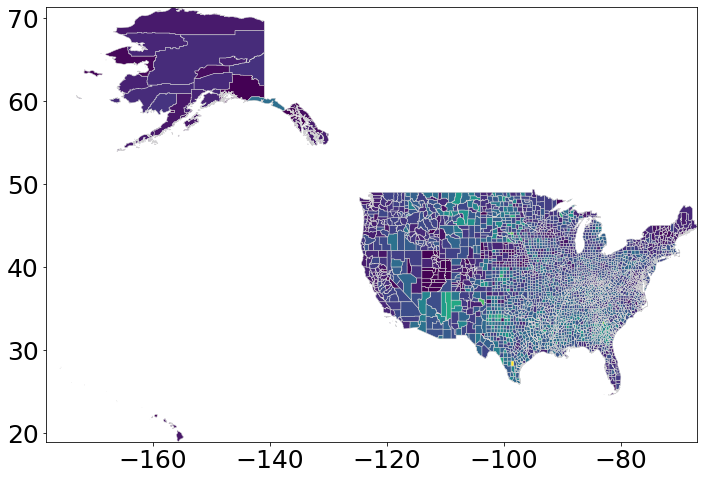

In [10]:
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_map_data[covid_map_data.index.get_level_values("date")== date]
df.plot(ax=ax, cax = ax, column=key, linewidth=.5, 
             edgecolor='lightgrey')

In [11]:
map_data["state"]

fips_code
21007     Kentucky
21017     Kentucky
21031     Kentucky
21065     Kentucky
21069     Kentucky
           ...    
31073     Nebraska
39075         Ohio
48171        Texas
55079    Wisconsin
26139     Michigan
Name: state, Length: 3142, dtype: object

<ipython-input-12-847b75fe5379>:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


(53.0, 71.0)

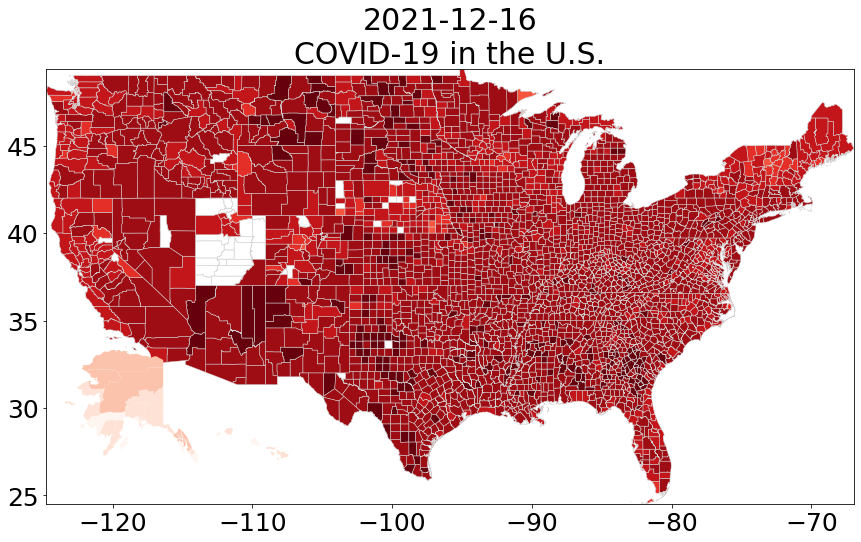

In [12]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
map_data = covid_map_data[covid_map_data.index.get_level_values("date")== date]
df = map_data[~map_data["state"].str.contains("Alaska|Hawaii")]
cmap = cm.get_cmap('Reds', 10)
vmin = 1 
vmax = df[key].max()
norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)
df.plot(ax=ax, cax = ax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
             norm = norm)
ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.", fontsize = 30)
axins = {}
axins["Alaska"] = inset_axes(ax, width="17%", height="35%", loc="lower left")
axins["Hawaii"] = inset_axes(ax, width="50%", height="40%", loc="lower left")
for state in axins.keys():
    axins[state].set_xticks([])
    axins[state].set_yticks([])
    axins[state].axis("off")
    map_data[map_data["state"].str.contains(state)].plot(
        ax = axins[state], cax = ax, cmap = cmap, norm = norm)
axins["Hawaii"].set_xlim(-161, -154)
axins["Alaska"].set_ylim(53, 71)


<ipython-input-13-a79d7fec78d8>:26: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-13-a79d7fec78d8>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


(53.0, 71.0)

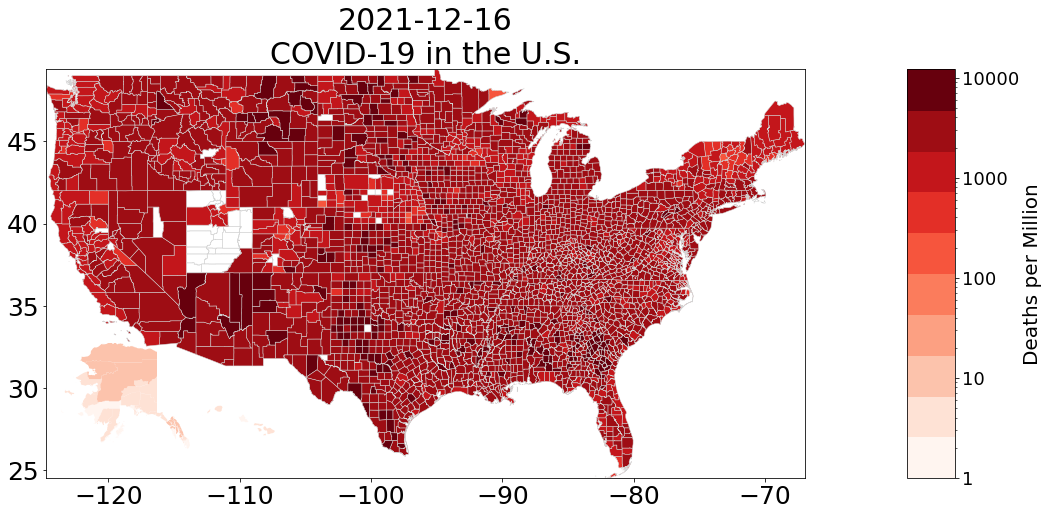

In [13]:

fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
# Replaces instances with zero deaths with one 
# mostly for estetic reasons, to aviod white on the chart
map_data = covid_map_data[covid_map_data.index.get_level_values("date")== date]
df = map_data[~map_data["state"].str.contains("Alaska|Hawaii")]
# sets the range of our colors 
vmin = 1 
vmax = df[key].max()
# makes our color map red blue 
cmap = cm.get_cmap('Reds', 10)
# formats the color bar 
norm = cm.colors.LogNorm(vmin = vmin, vmax = vmax)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# makes an epty array we will store things in later 
sm._A = []
# leaves some room for the color bar 
divider = make_axes_locatable(ax)
size = "5%" 
cax = divider.append_axes("right", size = size, pad = 0.1)
# achually puts the color bar in 
cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
cbar.ax.tick_params(labelsize=18)
vals = list(cbar.ax.get_yticks())
vals.append(vmax)
# gives us a numarical scale for the color bar 
cbar.ax.set_yticklabels([int(x) for x in vals])
cbar.ax.set_ylabel(key, fontsize = 20)


df.plot(ax=ax, cax = cax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
             norm = norm)
ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.", fontsize = 30)
axins = {}
axins["Alaska"] = inset_axes(ax, width="17%", height="30%", loc="lower left")
axins["Hawaii"] = inset_axes(ax, width="50%", height="40%", loc="lower left")
for state in axins.keys():
    axins[state].set_xticks([])
    axins[state].set_yticks([])
    axins[state].axis("off")
    map_data[map_data["state"].str.contains(state)].plot(
        ax = axins[state], cax = ax, cmap = cmap, norm = norm)
axins["Hawaii"].set_xlim(-161, -154)
axins["Alaska"].set_ylim(53, 71)

<ipython-input-14-ed397f5f4d4e>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-14-ed397f5f4d4e>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


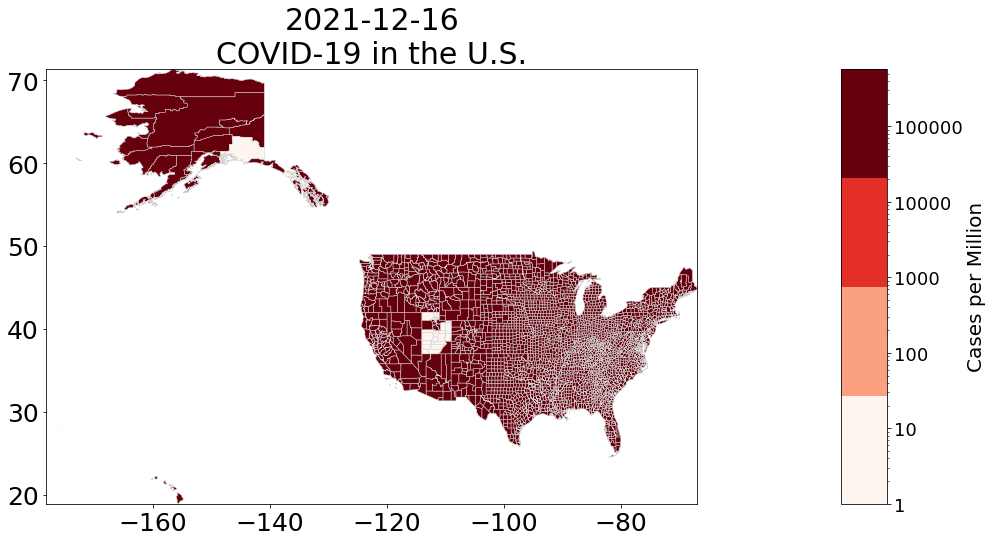

<ipython-input-14-ed397f5f4d4e>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-14-ed397f5f4d4e>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


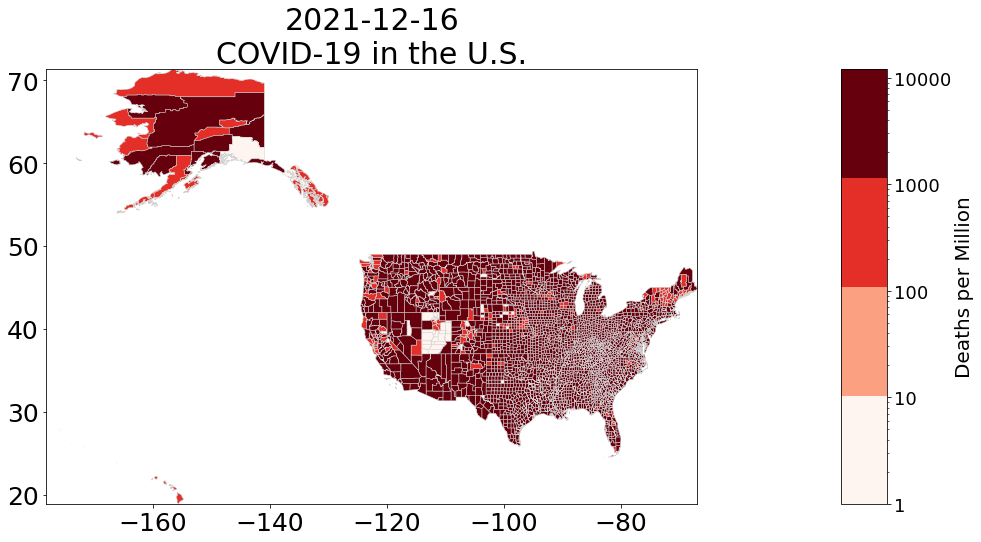

<ipython-input-14-ed397f5f4d4e>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-14-ed397f5f4d4e>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


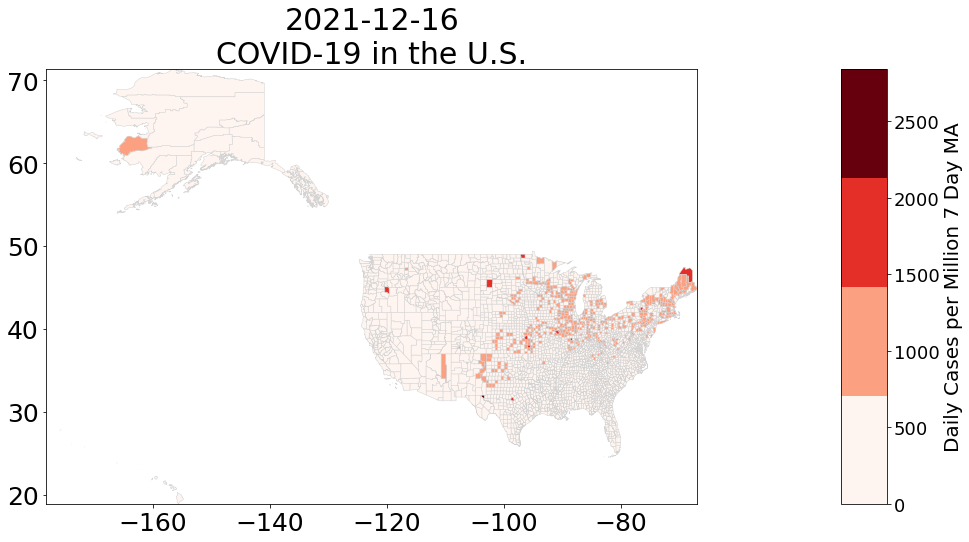

<ipython-input-14-ed397f5f4d4e>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-14-ed397f5f4d4e>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


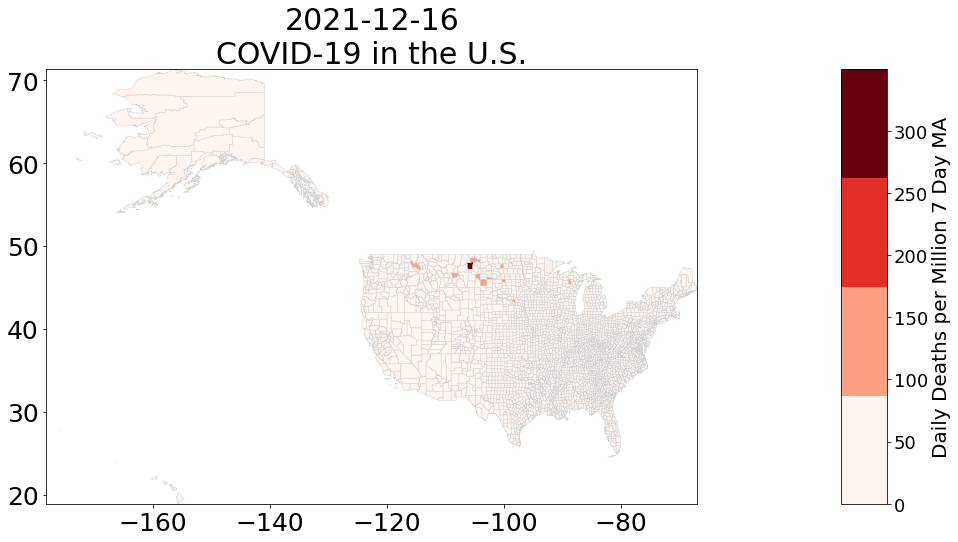

In [14]:
keys = ["Cases per Million", "Deaths per Million", 
        "Daily Cases per Million 7 Day MA", "Daily Deaths per Million 7 Day MA"]
for key in keys:
    # logs some extream values 
    # only logs totals, since daily rates wont be as extream 
    log = False if "Daily" in key else True
    fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
    plt.rcParams.update({"font.size": 30})
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    # once again we are making the values 1 inestead of zero for color reasons, beige is in season apparently 
    df = covid_map_data[covid_map_data.index.get_level_values("date")== date].replace(0,1)
    # sets the colorbar range 
    vmin = 1 if log else 0 
    vmax = df[key].max()
    # choose colormap
    cmap = cm.get_cmap('Reds', 4)
    # formats the chart
    if log:
        norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
    else:
        norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # making yet anouther empty array to store stuff in, why not just buy one from old joe's arry warehouse 
    sm._A = []
    # gives the color bar some space, its going through a lot right now 
    divider = make_axes_locatable(ax)
    size = "5%" 
    cax = divider.append_axes("right", size = size, pad = 0.1)
    # pinches the figures cheek to give it some color, come now it can go out looking like a zombie 
    cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)

    # sets the colorbar to have an int scale 
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize = 20)


    df.plot(ax=ax, cax = cax, column=key, vmin=vmin ,vmax = vmax, 
                 cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
                 norm = norm)
    ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.", fontsize = 30)

    plt.show()
    plt.close()

<ipython-input-15-a08a33da1581>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-15-a08a33da1581>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


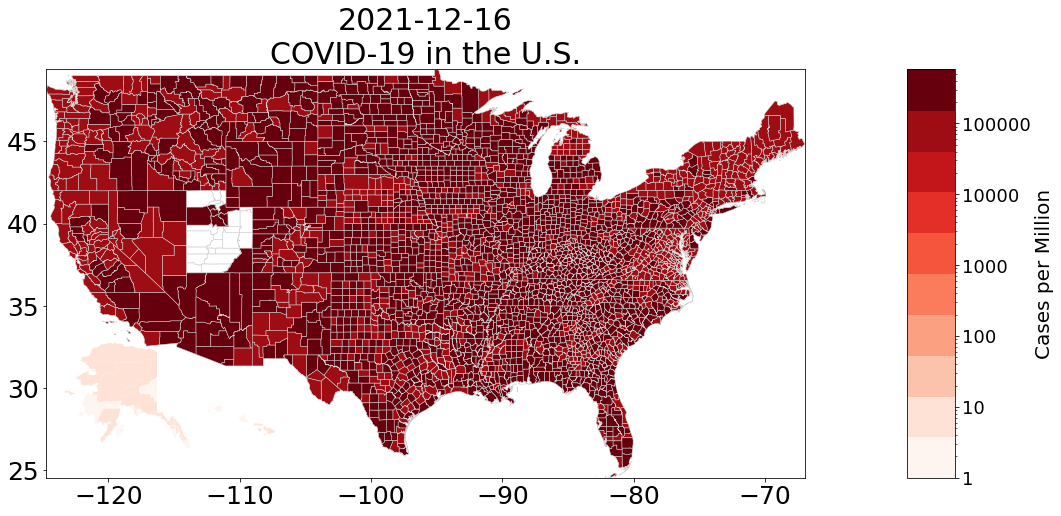

<ipython-input-15-a08a33da1581>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-15-a08a33da1581>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


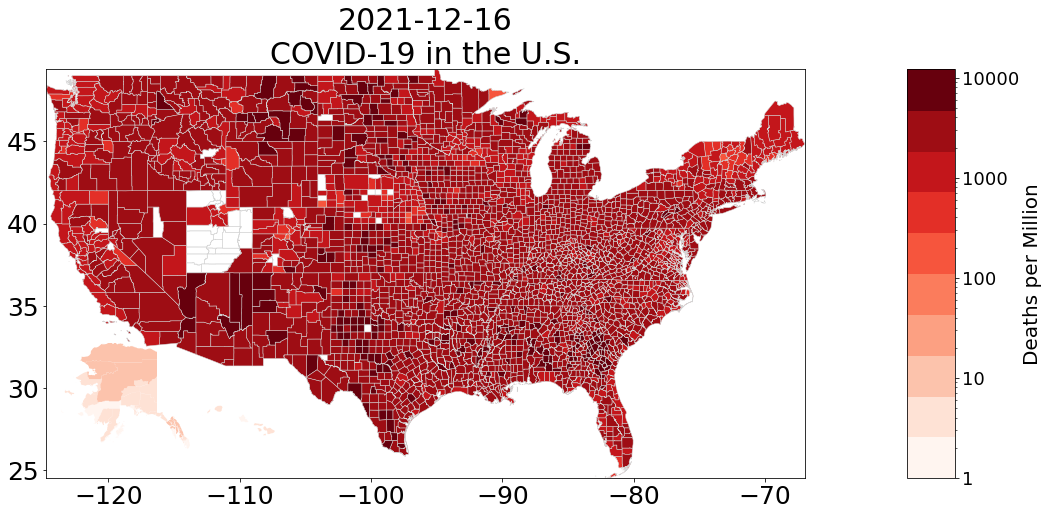

<ipython-input-15-a08a33da1581>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-15-a08a33da1581>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


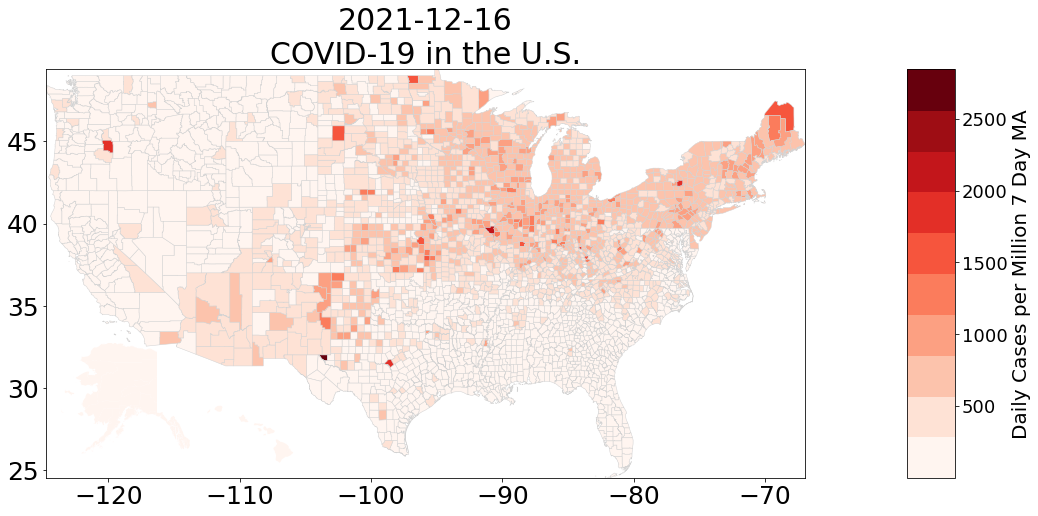

<ipython-input-15-a08a33da1581>:34: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
<ipython-input-15-a08a33da1581>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


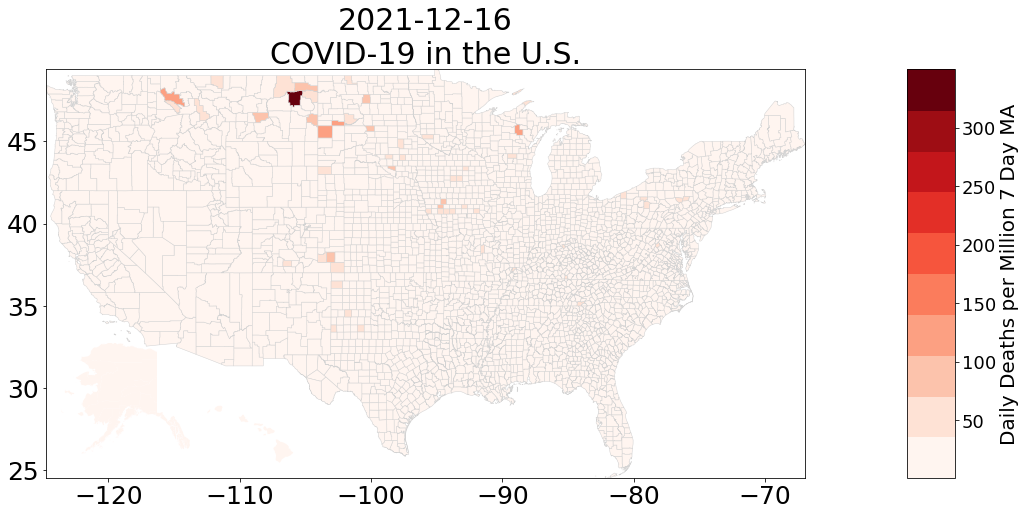

In [15]:
keys = ["Cases per Million", "Deaths per Million", 
        "Daily Cases per Million 7 Day MA", "Daily Deaths per Million 7 Day MA"]
for key in keys:
    fig, ax = plt.subplots(figsize=(18,8),
            subplot_kw = {'aspect': 'equal'})   
    plt.rcParams.update({"font.size": 30})
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    #changes the zeros to one so that the great beige army can finally have dominion over the united states 
    map_data = covid_map_data[covid_map_data.index.get_level_values("date")== date]
    df = map_data[~map_data["state"].str.contains("Alaska|Hawaii")]
    vmin = 1 
    vmax = df[key].max()

    cmap = cm.get_cmap('Reds', 10)
    # logs the leveles instead of other values 
    if "Daily" not in key:
        norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
    # if its daily just take the raw value 
    else:
        norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)

    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # one more empty arry 
    sm._A = []
    # add the colorbar to the figure
    divider = make_axes_locatable(ax)
    size = "5%" 
    # gives the color bar some breathing room 
    cax = divider.append_axes("right", size = size, pad = 0.1)
    # sets the color bar down gentally 
    cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    
    # makes the colorbar values a number, insted of a number, floats are diffrent I swear
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize = 20)

    df.plot(ax=ax, cax = cax, column=key, vmin=vmin ,vmax = vmax, 
                 cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
                 norm = norm)
    ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.", fontsize = 30)
    axins = {}
    axins["Alaska"] = inset_axes(ax, width="17%", height="30%", loc="lower left")
    axins["Hawaii"] = inset_axes(ax, width="50%", height="40%", loc="lower left")
    for state in axins.keys():
        axins[state].set_xticks([])
        axins[state].set_yticks([])
        axins[state].axis("off")
        map_data[map_data["state"].str.contains(state)].plot(
            ax = axins[state], cax = ax, cmap = cmap, norm = norm)
    axins["Hawaii"].set_xlim(-161, -154)
    axins["Alaska"].set_ylim(53, 71)
    
    plt.show()
    plt.close()